Homework 3 (100 Points)
In this homework, we will use the Diabetes dataset and Cancer dataset. (Note: You can use the built-in function from ML libraries for gradient descent, training, and validation.)


Problem 2 (20pts):
Use the cancer dataset to build a logistic regression model to classify the type of cancer (Malignant vs. benign). First, create a logistic regression that takes all 30 input features for classification. Please use 80% and 20% split between training and evaluation (test). Make sure to perform proper scaling and standardization before your training. Also, report your results, including accuracy, precision, recall and F1 score. At the end, plot the confusion matrix representing your binary classifier.
How about adding a weight penalty here, considering the number of parameters. Add the weight penalty and repeat the training and report the results.


In [1]:
import numpy as np
import pandas as pd

#Data Visualization:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()

url = 'https://raw.githubusercontent.com/HeedfulMoss/ECGR_4105_Intro_ML/main/Homework/Homework_3/cancer.csv'
df = pd.read_csv(url)
#df.head()



,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Pre-Processing.

In [2]:
df = df.drop('id', axis=1)
diagnosis = df.pop('diagnosis')
df.insert(30, 'label', diagnosis)

#print(df)

df.columns = np.append(breast.feature_names, 'diagnosis')
df['diagnosis'].replace('B', 0, inplace=True)
df['diagnosis'].replace('M', 1, inplace=True)

x = df.iloc[:, :30].values
y = df.iloc[:, 30].values

#Now we’ll do feature scaling to scale our data between 0 and 1 to get better accuracy.
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x = sc_X.fit_transform(x)

#Now we’ll split our Data set into Training Data and Test Data. Training data will be used to train our
#Logistic model and Test data will be used to validate our model. We’ll use Sklearn to split our data. We’ll import  train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state = 0)

<ipython-input-2-e2ede56f5df9>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['diagnosis'].replace('B', 0, inplace=True)
<ipython-input-2-e2ede56f5df9>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

Logistic Regression.

In [3]:
#Import LogisticRegression from sklearn.linear_model
#Make an instance classifier of the object LogisticRegression and give random_state =  0
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

LogisticRegression. Confusion Matrix.

In [4]:
#Using Confusion matrix we can get accuracy of our model.
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
#print(cnf_matrix)

Building Model and getting accuracy.

In [5]:
#Let's evaluate the model using model evaluation metrics such as accuracy, precision, and recall.
from sklearn import metrics

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)

print("Training results: loss, and classification accuracy over iterations")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print()

#Full Report
print("Full Report:")
print(metrics.classification_report(y_test, y_pred))
print()
print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

Training results: loss, and classification accuracy over iterations
Accuracy: 0.9649122807017544
Precision: 0.9574468085106383
Recall: 0.9574468085106383
F1 Score: 0.9574468085106383

Full Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        67
           1       0.96      0.96      0.96        47

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114


Confusion Matrix:
[[65  2]
 [ 2 45]]


Plotting Results

Text(0.5, 427.9555555555555, 'Predicted label')

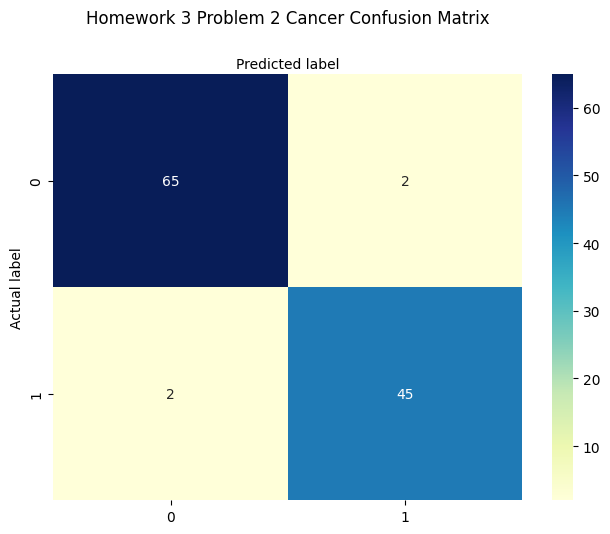

In [6]:
class_names = ["Negative Outcome (0)", "Positive Outcome (1)"]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
#create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap ="YlGnBu",fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Homework 3 Problem 2 Cancer Confusion Matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Parameter Penalty

In [7]:
C = [10, 5, 1, .1, .001]
x_train2 =  x_train
x_test2 = x_test

for c in C:
    clf = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    clf.fit(x_train2, y_train)
    print('C:', c)
    print('Training accuracy:\t%5.4f' %clf.score(x_train2, y_train))
    print('Test accuracy:\t\t%5.4f' %clf.score(x_test2, y_test))
    print('')

C: 10
Training accuracy:	0.9890
Test accuracy:		0.9474

C: 5
Training accuracy:	0.9868
Test accuracy:		0.9649

C: 1
Training accuracy:	0.9890
Test accuracy:		0.9561

C: 0.1
Training accuracy:	0.9758
Test accuracy:		0.9737

C: 0.001
Training accuracy:	0.6374
Test accuracy:		0.5877



Logistic Regression with Parameters Penalty



In [8]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty='l1', C=0.1, solver='liblinear')
clf.fit(x_train2, y_train)

y_pred2 = clf.predict(x_test2)

param_cnf_matrix = confusion_matrix(y_test, y_pred2)

Model Eval

In [9]:

accuracy2 = metrics.accuracy_score(y_test, y_pred2)
precision2 = metrics.precision_score(y_test, y_pred2)
recall2 = metrics.recall_score(y_test, y_pred2)
f12 = metrics.f1_score(y_test, y_pred2)

print("Training results: loss, and classification accuracy over iterations")
print(f"Accuracy: {accuracy2}")
print(f"Precision: {precision2}")
print(f"Recall: {recall2}")
print(f"F1 Score: {f12}")
print()

#Full Report
print("Full Report:")
print(metrics.classification_report(y_test, y_pred2))
print()
print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test, y_pred2))

Training results: loss, and classification accuracy over iterations
Accuracy: 0.9736842105263158
Precision: 0.9782608695652174
Recall: 0.9574468085106383
F1 Score: 0.967741935483871

Full Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        67
           1       0.98      0.96      0.97        47

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Confusion Matrix:
[[66  1]
 [ 2 45]]


Plots with parameters penalty.

Text(0.5, 427.9555555555555, 'Predicted label')

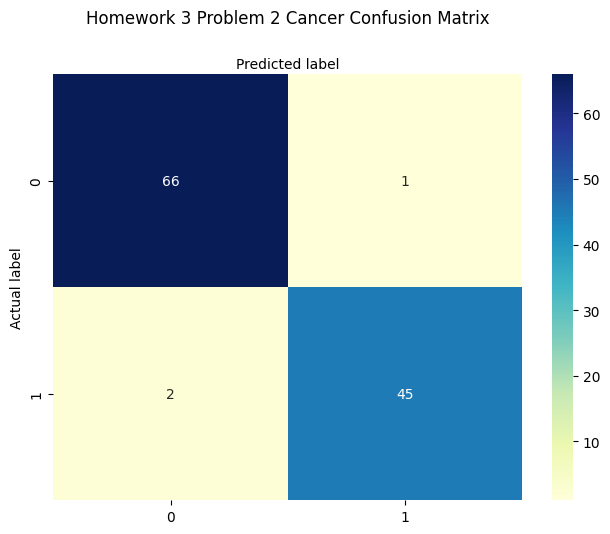

In [10]:
class_names = ["Negative Outcome (0)", "Positive Outcome (1)"]
fig, ax = plt.subplots()
tick_marks = np.arange(len(param_cnf_matrix))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
#create heatmap
sns.heatmap(pd.DataFrame(param_cnf_matrix), annot=True, cmap ="YlGnBu",fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Homework 3 Problem 2 Cancer Confusion Matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')